**IMPORTING LIB** 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize']=(12,8)

**Reading data file**

In [ ]:
data = pd.read_csv('bike_sharing_data.txt')
data.count()

Population    97
Profit        97
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


**Visualize the data**

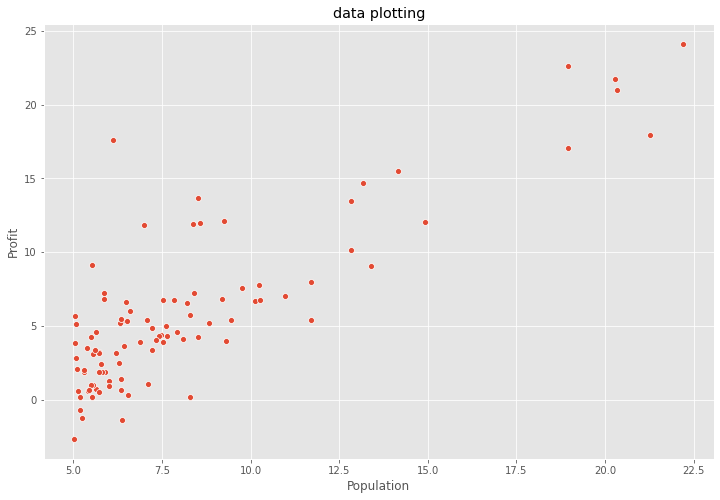

In [ ]:
ax = sns.scatterplot(x="Population",y="Profit",data=data)
ax.set_title("data plotting");


**Cost Function** 

In [ ]:
#cost function
def cost_function(X,y,theta):
  m=len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2

  return 1/(2*m) * np.sum(error)

In [ ]:
m = data.Population.values.size
X = np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

In [ ]:
cost_function(X,y,theta)

32.072733877455676

**Batch Gradient Descent Alogorithm**

In [ ]:
def gradient_descent(X,y,theta,alpha,iterations):
  m=len(y)
  costs = []
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(),(y_pred - y))
    theta -= alpha * 1/m * error
    costs.append(cost_function(X,y,theta))
  return theta , costs

In [ ]:
theta , costs = gradient_descent(X,y,theta,alpha=0.01,iterations=2000)

print("h(x) = {} +{}x1 ".format(str(round(theta[0,0],2)),
                                str(round(theta[1,0],2))))

h(x) = -3.79 +1.18x1 


**Visualising gradient descent**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1 ,4 ,100)

cost_values = np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i],theta_1[j]])
    cost_values[i,j] = cost_function(X,y,t)

  

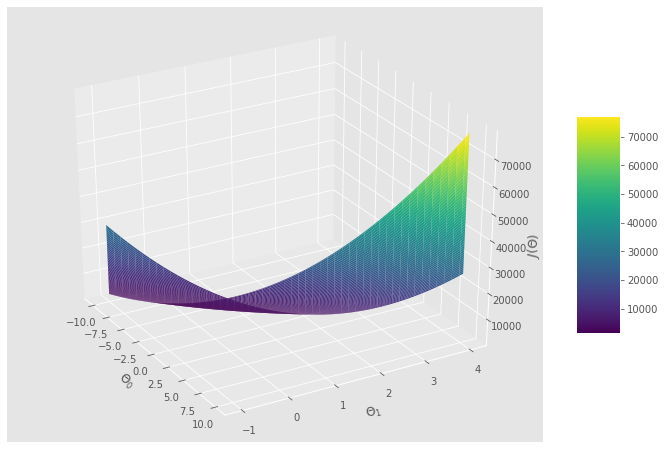

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0,theta_1,cost_values, cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30,330)
plt.show()

**Plot the Concergence**

Text(0.5, 1.0, 'Values of Cost Function over iterations of Gradient Descent')

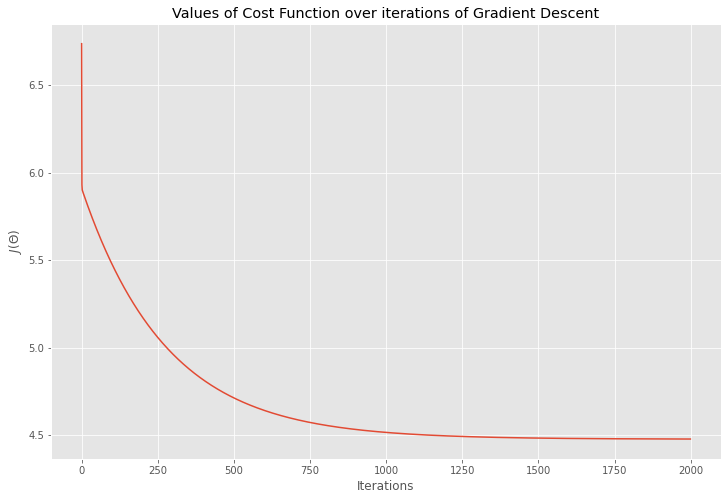

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent")

# Training Data with Regression Fit

In [ ]:
theta

array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'Liner Regression Fit')

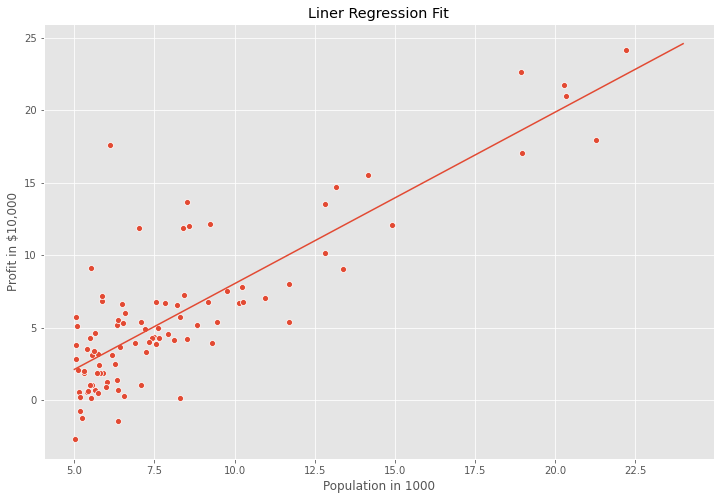

In [ ]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population",y="Profit",data=data)
x_values = [x for x in range(5,25)]
y_values = [(x * theta[1]+theta[0]) for x in x_values]

sns.lineplot(x_values,y_values)
plt.xlabel("Population in 1000")
plt.ylabel("Profit in $10,000")
plt.title("Liner Regression Fit")

# Inference using Optimized theta values

In [ ]:
def predict(x,theta):
  y_pred = np.dot(theta.transpose(),x)
  return y_pred

In [ ]:
y_1 = predict(np.array([1,8.3]),theta)*10000
print(round(y_1))

60243.0
